## Electricity Usage Analysis

## Objective : 1 Prepare the data for analysis
- Read in 4 columns from powerconsumption.csv: Datetime, PowerConsumption_Zone1, PowerConsumption_Zone2, PowerConsumption_Zone3.Make sure the Datetime column read in as a datetime.
- Create a 'total-Consumption' column, which represents the sum of the three 'PowerConsumption' columns.
- Create two columns by extracting the date parts from the 'Datetime' column: 'hour' which represents the hour of day, and day_of_week, which represents the day of week.

In [1]:
import pandas as pd

In [5]:
consumption = pd.read_csv('powerconsumption.csv')

In [6]:
consumption.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [14]:
consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   PowerConsumption_Zone1  52416 non-null  float64
 2   PowerConsumption_Zone2  52416 non-null  float64
 3   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.6+ MB


1. Read in 4 columns from powerconsumption.csv: Datetime, PowerConsumption_Zone1, PowerConsumption_Zone2, PowerConsumption_Zone3.Make sure the Datetime column read in as a datatime.

In [15]:
consumption = pd.read_csv('powerconsumption.csv',
                          usecols=['Datetime', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3'],
                          parse_dates=['Datetime']
                         )

In [16]:
# Display the first few rows of the DataFrame
consumption.head(5)

,Datetime,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,2017-01-01 00:00:00,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,27335.69620,17872.34043,18442.40964


In [ ]:

consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Datetime                52416 non-null  datetime64[ns]
 1   PowerConsumption_Zone1  52416 non-null  float64       
 2   PowerConsumption_Zone2  52416 non-null  float64       
 3   PowerConsumption_Zone3  52416 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.6 MB


2. Create a 'total-Consumption' column, which represents the sum of the three 'PowerConsumption' columns.

In [25]:
consumption = pd.read_csv('powerconsumption.csv',
                          usecols=["Datetime", "PowerConsumption_Zone1","PowerConsumption_Zone2","PowerConsumption_Zone3"],
                          parse_dates= ["Datetime"]
                          ).assign(total_consumption = lambda x :x["PowerConsumption_Zone1"] + x["PowerConsumption_Zone2"] + x["PowerConsumption_Zone3"]
                          )

In [26]:
consumption.head()

,Datetime,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,total_consumption
0,2017-01-01 00:00:00,34055.69620,16128.87538,20240.96386,70425.53544
1,2017-01-01 00:10:00,29814.68354,19375.07599,20131.08434,69320.84387
2,2017-01-01 00:20:00,29128.10127,19006.68693,19668.43373,67803.22193
3,2017-01-01 00:30:00,28228.86076,18361.09422,18899.27711,65489.23209
4,2017-01-01 00:40:00,27335.69620,17872.34043,18442.40964,63650.44627


In [27]:
consumption.tail()

,Datetime,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,total_consumption
52411,2017-12-30 23:10:00,31160.45627,26857.31820,14780.31212,72798.08659
52412,2017-12-30 23:20:00,30430.41825,26124.57809,14428.81152,70983.80786
52413,2017-12-30 23:30:00,29590.87452,25277.69254,13806.48259,68675.04965
52414,2017-12-30 23:40:00,28958.17490,24692.23688,13512.60504,67163.01682
52415,2017-12-30 23:50:00,28349.80989,24055.23167,13345.49820,65750.53976


3. Create two columns by extracting the date parts from the 'Datetime' column: 'hour' which represents the hour of day, and day_of_week, which represents the day of week.

In [28]:
consumption = pd.read_csv('powerconsumption.csv',
                          usecols=["Datetime", "PowerConsumption_Zone1","PowerConsumption_Zone2","PowerConsumption_Zone3"],
                          parse_dates= ["Datetime"]
                          ).assign(total_consumption = lambda x :x["PowerConsumption_Zone1"] + x["PowerConsumption_Zone2"] + x["PowerConsumption_Zone3"],
                            hour = lambda x :x["Datetime"].dt.hour,
                            day_of_week = lambda x :x["Datetime"].dt.dayofweek,
                          )

In [29]:
consumption.head(5)

,Datetime,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,total_consumption,hour,day_of_week
0,2017-01-01 00:00:00,34055.69620,16128.87538,20240.96386,70425.53544,0,6
1,2017-01-01 00:10:00,29814.68354,19375.07599,20131.08434,69320.84387,0,6
2,2017-01-01 00:20:00,29128.10127,19006.68693,19668.43373,67803.22193,0,6
3,2017-01-01 00:30:00,28228.86076,18361.09422,18899.27711,65489.23209,0,6
4,2017-01-01 00:40:00,27335.69620,17872.34043,18442.40964,63650.44627,0,6


## Objective : 2 Visualize consumption over time
- Resample the data, so each row represents one-hour increment, rather tahn 10-minute increments. Calculate mean of the three Power Consumption columns when doing go and ignor 'total_Consumption' for now.
- Filter the data down to just the month of January 2017.
- Create a stacked line chart using the three original 'Power Consumption' Columns, with the datetime as the x-axis. Remove the top and right borders of the chart, add axis lables, and add a title.


1.  Resample the data, so each row represents one-hour increment, rather tahn 10-minute increments. Calculate mean of the three Power Consumption columns when doing go and ignor 'total_Consumption' for now.

In [30]:
consumption.set_index("Datetime")

,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,total_consumption,hour,day_of_week
Datetime,,,,,,
2017-01-01 00:00:00,34055.69620,16128.87538,20240.96386,70425.53544,0,6
2017-01-01 00:10:00,29814.68354,19375.07599,20131.08434,69320.84387,0,6
2017-01-01 00:20:00,29128.10127,19006.68693,19668.43373,67803.22193,0,6
2017-01-01 00:30:00,28228.86076,18361.09422,18899.27711,65489.23209,0,6
2017-01-01 00:40:00,27335.69620,17872.34043,18442.40964,63650.44627,0,6
...,...,...,...,...,...,...
2017-12-30 23:10:00,31160.45627,26857.31820,14780.31212,72798.08659,23,5
2017-12-30 23:20:00,30430.41825,26124.57809,14428.81152,70983.80786,23,5
2017-12-30 23:30:00,29590.87452,25277.69254,13806.48259,68675.04965,23,5


In [31]:
(consumption
    .set_index("Datetime")
    .resample("H")
    ["PowerConsumption_Zone1", "PowerConsumption_Zone2","PowerConsumption_Zone3"]
    .mean() #filter the data down to just the month of January 2017
    .loc["2017-01"]
 )

C:\Users\admin\AppData\Local\Temp\ipykernel_12380\3235946130.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample("H")


,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
Datetime,,,
2017-01-01 00:00:00,29197.974683,18026.747720,19252.048193
2017-01-01 01:00:00,24657.215190,16078.419453,17042.891567
2017-01-01 02:00:00,22083.037973,14330.699088,15676.144578
2017-01-01 03:00:00,20811.139240,13219.452887,14883.855422
2017-01-01 04:00:00,20475.949367,12921.580547,14317.108433
...,...,...,...
2017-01-31 19:00:00,42843.544303,25438.297875,25731.084337
2017-01-31 20:00:00,43023.797470,25429.787233,26003.855422
2017-01-31 21:00:00,41560.506330,25259.574468,25527.710845


3. Create a stacked line chart using the three original 'Power Consumption' Columns, with the datetime as the x-axis. Remove the top and right borders of the chart, add axis lables, and add a title.


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\admin\AppData\Local\Temp\ipykernel_12380\1542498214.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample("H")


<Figure size 600x400 with 0 Axes>

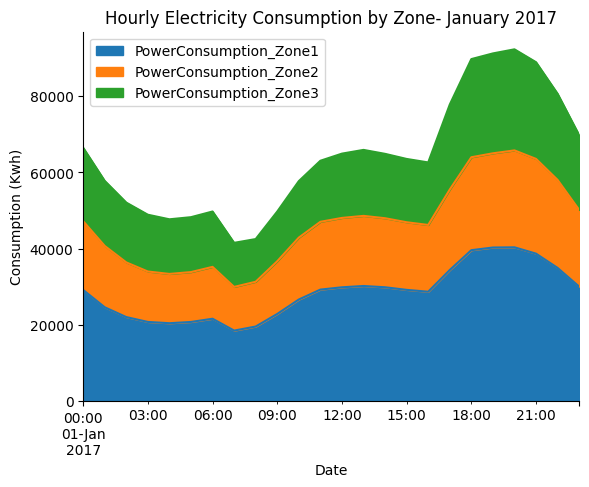

In [41]:
plt.figure(figsize=(6, 4))
(consumption
    .set_index("Datetime")
    .resample("H")
    ["PowerConsumption_Zone1", "PowerConsumption_Zone2","PowerConsumption_Zone3"]
    .mean() #filter the data down to just the month of January 2017
    .loc["2017-01-01"]
    .plot
    .area(
          title = "Hourly Electricity Consumption by Zone- January 2017",
          xlabel = "Date",
          ylabel ="Consumption (Kwh)"
          
    )
 )

sns.despine()


## Objective : 3 Visualize consumption seasonality
- Create a pivot table where the rows are the day of week, the columns are the hour of the da, and the cells represent the average value of total_cunsumption.
- Using the pivot table, create a heatmap. Remove the color bar and use a non-default colormap make sure your heatmap is stored in order of day of week and hour of day.
- What trends and patterns do you notice in power consumption? Do any days of the week have different consumption patterns than others?
- Challenge: Instead of integers, use the names of the day, (use categorical datatype if working with python).

In [42]:
consumption.head()

,Datetime,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,total_consumption,hour,day_of_week
0,2017-01-01 00:00:00,34055.69620,16128.87538,20240.96386,70425.53544,0,6
1,2017-01-01 00:10:00,29814.68354,19375.07599,20131.08434,69320.84387,0,6
2,2017-01-01 00:20:00,29128.10127,19006.68693,19668.43373,67803.22193,0,6
3,2017-01-01 00:30:00,28228.86076,18361.09422,18899.27711,65489.23209,0,6
4,2017-01-01 00:40:00,27335.69620,17872.34043,18442.40964,63650.44627,0,6


1. Create a pivot table where the rows are the day of week, the columns are the hour of the da, and the cells represent the average value of total_cunsumption.

In [44]:
consumption.pivot_table(
         index = "day_of_week",
         columns = "hour",
         values = "total_consumption",
         aggfunc = "mean"
)

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,
0,67817.926234,61755.422717,58647.360270,56399.125350,54823.472531,51680.112788,50810.531813,52647.477122,58153.995604,64829.891067,...,76295.125575,74951.160542,73672.590199,77737.724117,87015.319529,96344.104726,98636.766753,94795.229937,87444.628027,77141.248435
1,67935.356547,61868.544847,58801.200586,56642.907327,55088.146346,52165.725002,51320.086009,53314.431143,58788.751316,65473.069281,...,76564.586378,75151.608847,73866.089284,78034.431306,87425.955170,96812.639776,98951.522986,95247.295786,88105.205865,77583.710692
2,68239.842528,62022.724317,58798.761412,56626.703787,55114.497390,52157.866552,51411.322040,53186.989913,58830.511611,65583.730610,...,77084.718564,75799.737721,74690.144168,78963.032971,88010.877872,97121.892997,99259.106506,95347.105487,87966.060059,77526.249785
3,68293.632675,62187.544469,59063.328906,56958.133058,55465.004964,52336.590999,51408.387710,53305.035278,58985.960718,65850.016097,...,77129.099508,76024.015184,74771.523732,78859.415340,88130.713827,97361.509809,99639.276059,95745.056611,88461.996304,78369.942328
4,68959.251459,62533.960861,59152.040758,56825.429786,55296.351259,52178.788896,51156.640309,52771.135698,58250.443622,65179.083324,...,74344.497887,73169.524043,72295.790052,76172.341277,85512.967870,94802.624915,97380.905756,94232.932202,87846.655100,78259.646904
5,68991.576226,62628.416936,59321.825090,56745.339022,54816.778024,51275.831269,49144.134609,49769.161118,55718.168776,63423.248858,...,74654.603723,72910.123153,71972.130743,75921.019762,85309.097439,94902.067927,96852.132434,93754.497597,88284.551471,79287.720731
6,69728.136464,63113.302575,59243.071267,56207.553656,53896.627602,49677.139543,46078.167596,44983.099866,49619.256706,56571.380742,...,70039.555630,68585.463342,67570.378727,71844.793038,81580.676389,92171.105678,95540.060279,93301.028513,87069.268851,77031.733676


2. Using the pivot table, create a heatmap. Remove the color bar and use a non-default colormap make sure your heatmap is stored in order of day of week and hour of day.

[Text(0.5, 1.0, 'Power Consumption by Day of Week and Hour')]

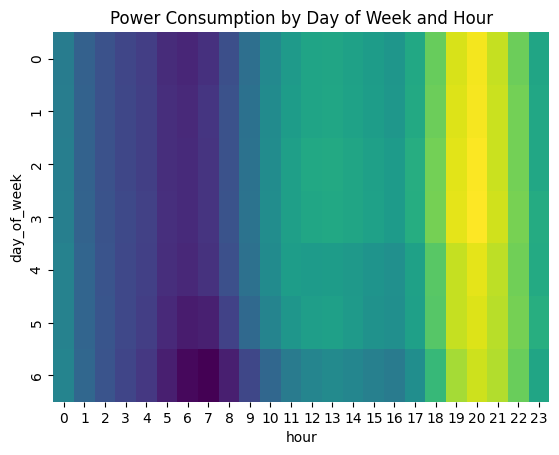

In [47]:
sns.heatmap(
    consumption.pivot_table(
         index = "day_of_week",
         columns = "hour",
         values = "total_consumption",
         aggfunc = "mean"
      ),
      cbar = None,
      cmap="viridis"
  ).set(title = "Power Consumption by Day of Week and Hour")

In [48]:
consumption["day_name"] = consumption["Datetime"].dt.day_name()
consumption.head()

,Datetime,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,total_consumption,hour,day_of_week,day_name
0,2017-01-01 00:00:00,34055.69620,16128.87538,20240.96386,70425.53544,0,6,Sunday
1,2017-01-01 00:10:00,29814.68354,19375.07599,20131.08434,69320.84387,0,6,Sunday
2,2017-01-01 00:20:00,29128.10127,19006.68693,19668.43373,67803.22193,0,6,Sunday
3,2017-01-01 00:30:00,28228.86076,18361.09422,18899.27711,65489.23209,0,6,Sunday
4,2017-01-01 00:40:00,27335.69620,17872.34043,18442.40964,63650.44627,0,6,Sunday


[Text(0.5, 1.0, 'Power Consumption by Day of Week and Hour')]

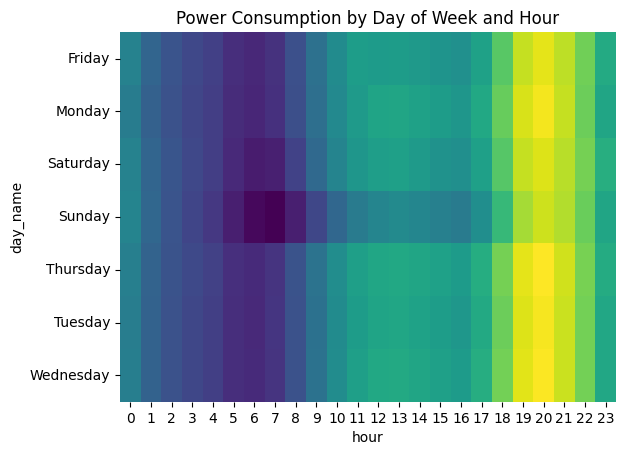

In [50]:
sns.heatmap(
    consumption.pivot_table(
         index = "day_name",
         columns = "hour",
         values = "total_consumption",
         aggfunc = "mean"
      ),
      cbar = None,
      cmap="viridis"
  ).set(title = "Power Consumption by Day of Week and Hour")

3. What trends and patterns do you notice in power consumption? Do any days of the week have different consumption patterns than others?

In [51]:
day_of_week = ["Monday", "Tuesday","Wednesday","Thursday", "Friday", "Saturday", "Sunday"]

consumption["day_name"] = pd.Categorical(consumption["Datetime"].dt.day_name(), categories = day_of_week, ordered = True)

C:\Users\admin\AppData\Local\Temp\ipykernel_12380\3516123056.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  consumption.pivot_table(


[Text(0.5, 1.0, 'Power Consumption by Day of Week and Hour')]

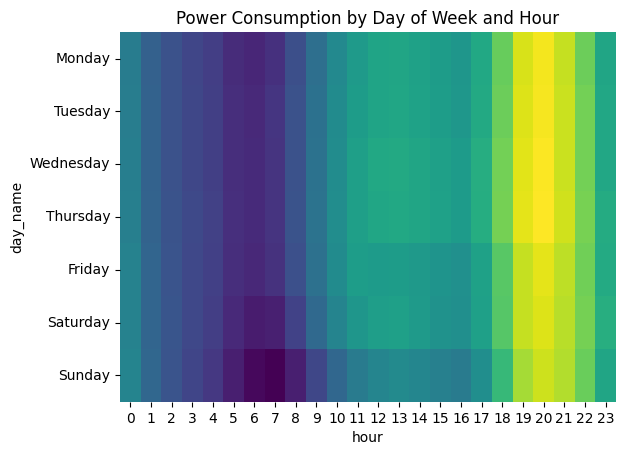

In [52]:
sns.heatmap(
    consumption.pivot_table(
         index = "day_name",
         columns = "hour",
         values = "total_consumption",
         aggfunc = "mean"
      ),
      cbar = None,
      cmap="viridis"
  ).set(title = "Power Consumption by Day of Week and Hour")

In [53]:
# What was the average total electricity consumption on Monday at 1AM?
average_consumption_monday_1am = consumption.query("day_name == 'Monday' and hour == 1")["total_consumption"].mean()
print(f"Average total electricity consumption on Monday at 1AM: {average_consumption_monday_1am:.2f} Kwh")


Average total electricity consumption on Monday at 1AM: 61755.42 Kwh
